# MeLiSA: Mercado Libre for Sentiment Analysis


* `get_parts_in_csv.py` convierte las partes descargadas en un csv único y sin repeticiones. Este archivo es `reviews_all.csv`.

* `process_csv.py` recolecta de `reviews_all.csv` los reviews más importantes, redefine las categorías y limita por producto, categoría y rate. De todo esto, salen los archivos `reviews_esp_full.csv` para español y `reviews_por_full.csv` para portugués. 

* `clean_dataset.py` utiliza los archivos `reviews_esp_full.csv` y `reviews_por_full.csv` para eliminar los reviews que son basura. Este genera un par de archivos intermedios que sirven para identificar los reviews basura, obteniendo como resultado final los archivos `reviews_esp_cleaned.csv` y `reviews_por_cleaned.csv`

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_esp = pd.read_csv('./reviews_esp_cleaned.csv')
df_por = pd.read_csv('./reviews_por_cleaned.csv')

Ahora separamos en train y test

MLB
MLA
MLM
MLU
MCO
MLC
MLV
MPE


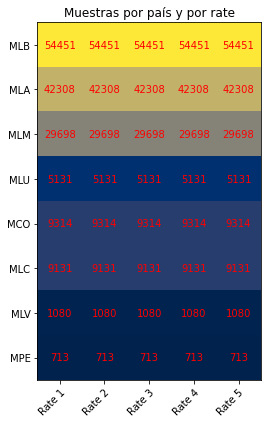

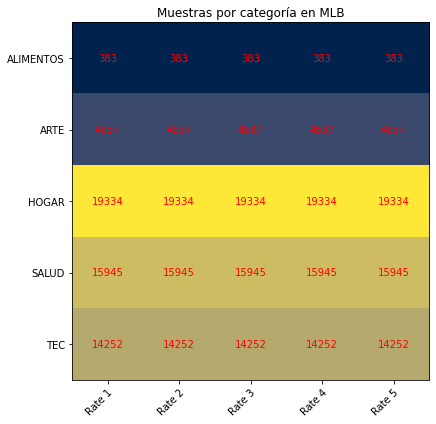

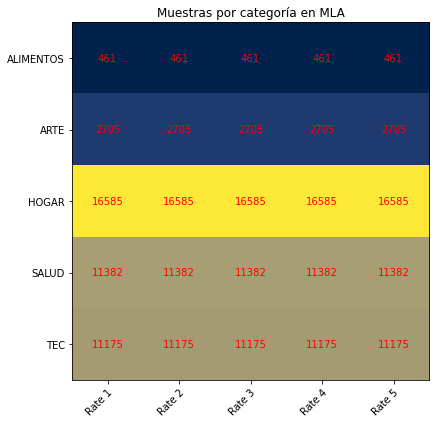

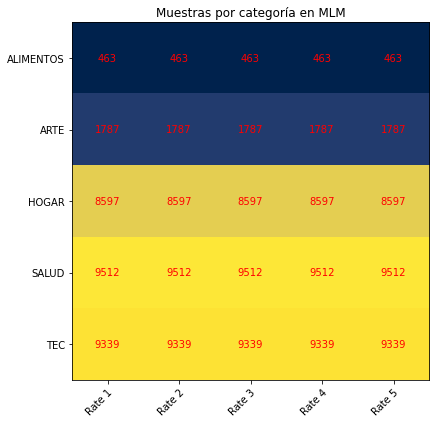

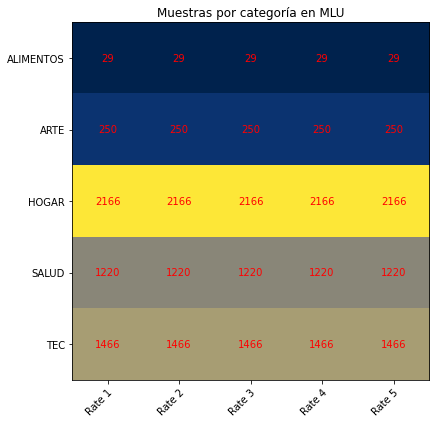

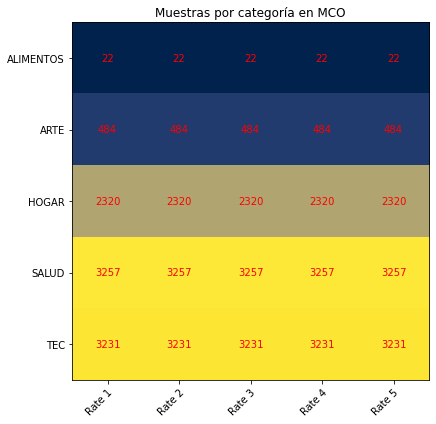

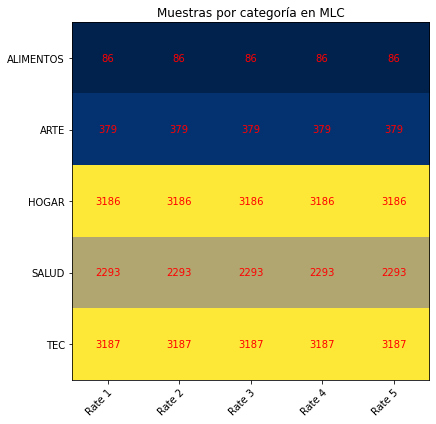

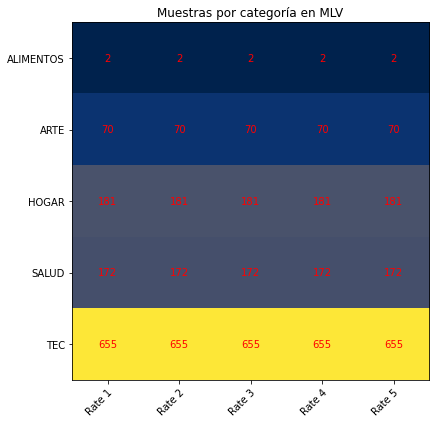

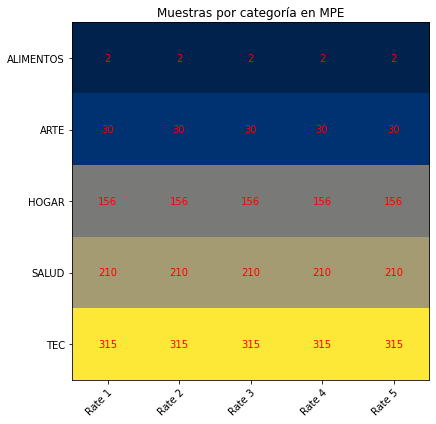

In [21]:
def plot_heatmap(matrix,yticks,xticks,title):

    fig, ax = plt.subplots(1,1,figsize=(10,6))
    im = ax.imshow(matrix,cmap='cividis')

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(xticks)))
    ax.set_yticks(np.arange(len(yticks)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(['Rate {}'.format(s) for s in xticks])
    ax.set_yticklabels(yticks)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(yticks)):
        for j in range(len(xticks)):
            text = ax.text(j, i, matrix[i, j],
                        ha="center", va="center", color="red")

    ax.set_title(title)
    fig.tight_layout()
    return fig, ax


def plot_samples(df,countries,rates,abbreviations):

    categories = sorted(list(abbreviations.keys()))
    abbs = [abbreviations[cat] for cat in categories]   

    matrix = np.zeros((len(countries),len(rates)),dtype=np.int)
    for i,country in enumerate(countries):
        for j,rate in enumerate(rates):
            mymask = (df['review_rate'] == rate) & (df['country'] == country)
            matrix[i,j] = len(df[mymask])

    fig, ax = plot_heatmap(matrix,countries,rates,title='Muestras por país y por rate')
    fig.show()

    for country in countries:
        print(country)
        matrix = np.zeros((len(categories),len(rates)),dtype=np.int)
        for i,category in enumerate(categories):
            for j,rate in enumerate(rates):
                mymask = (df['review_rate'] == rate) & (df['category'] == category) \
                    & (df['country'] == country)
                matrix[i,j] = mymask.sum()

        fig, ax = plot_heatmap(matrix,abbs,rates,
        title='Muestras por categoría en {}'.format(country))
        fig.show()

df = pd.concat([df_esp,df_por],ignore_index=True)
countries = ['MLB','MLA','MLM','MLU','MCO','MLC','MLV','MPE']
rates = [1, 2, 3, 4, 5]

abbreviations = {'Hogar / Casa': 'HOGAR',
'Tecnología y electrónica / Tecnologia e electronica': 'TEC',
'Arte y entretenimiento / Arte e Entretenimiento': 'ARTE',
'Salud, ropa y cuidado personal / Saúde, roupas e cuidado pessoal': 'SALUD',
'Alimentos y Bebidas / Alimentos e Bebidas': 'ALIMENTOS'}
inv_abbreviations = {v:k for k,v in abbreviations.items()}

plot_samples(df,countries,rates,abbreviations)  

MLA
MLM
MLU
MCO
MLC
MLV
MPE


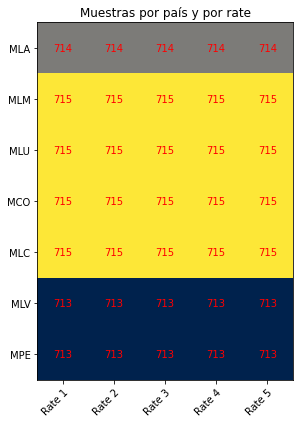

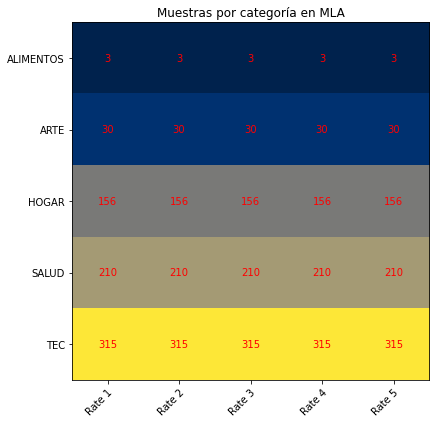

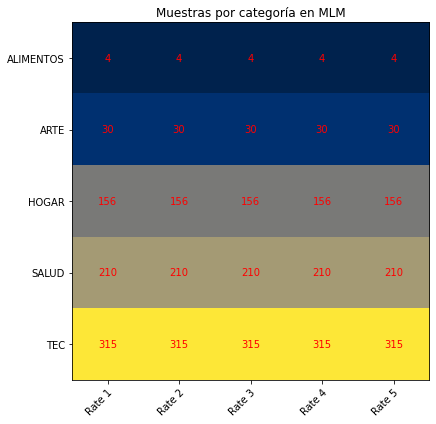

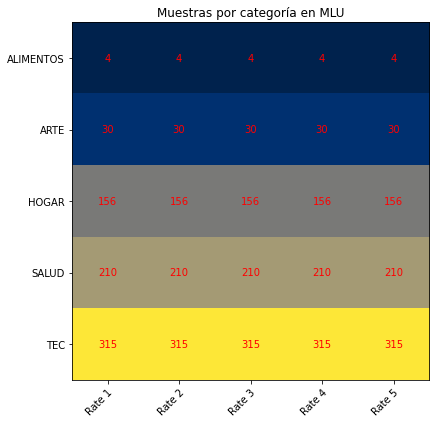

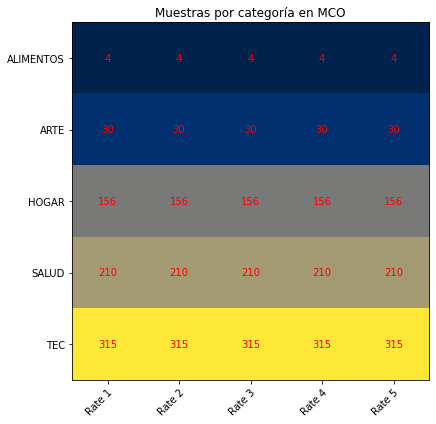

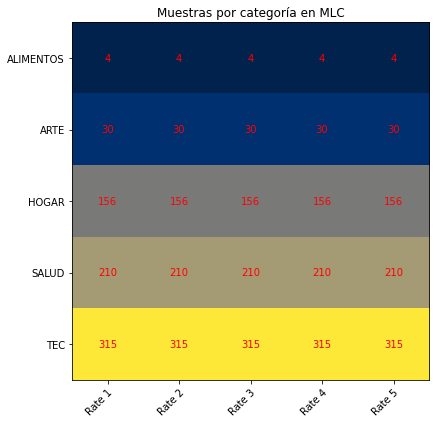

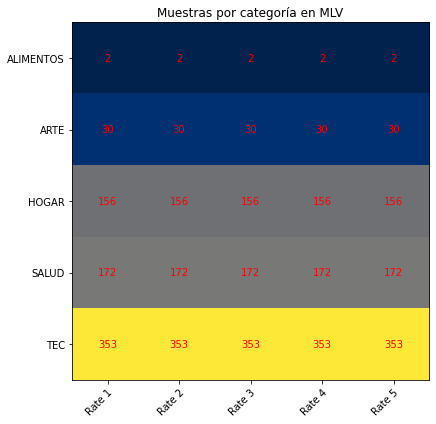

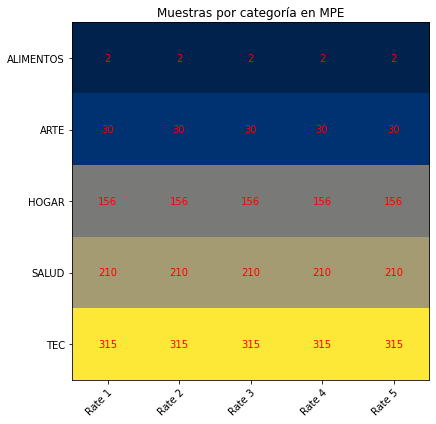

In [39]:
esp_countries = ['MLA','MLM','MLU','MCO','MLC','MLV','MPE']
country_samples = {
    'MLB':{'ALIMENTOS': 23,'ARTE':210,'HOGAR': 1092,'SALUD':1432,'TEC':2243},
    'MLA':{'ALIMENTOS': 3,'ARTE':30,'HOGAR': 156,'SALUD':210,'TEC':315},
    'MLM':{'ALIMENTOS': 4,'ARTE':30,'HOGAR': 156,'SALUD':210,'TEC':315},
    'MLU':{'ALIMENTOS': 4,'ARTE':30,'HOGAR': 156,'SALUD':210,'TEC':315},
    'MCO':{'ALIMENTOS': 4,'ARTE':30,'HOGAR': 156,'SALUD':210,'TEC':315},
    'MLC':{'ALIMENTOS': 4,'ARTE':30,'HOGAR': 156,'SALUD':210,'TEC':315},
    'MLV':{'ALIMENTOS': 2,'ARTE':30,'HOGAR': 156,'SALUD':172,'TEC':353},
    'MPE':{'ALIMENTOS': 2,'ARTE':30,'HOGAR': 156,'SALUD':210,'TEC':315}
}

rs = np.random.RandomState(776436538)
test_indices = []
for country in esp_countries:
    for cat, n in country_samples[country].items():
        idx = df_esp[(df_esp['country'] == country) & \
            (df_esp['category'] == inv_abbreviations[cat])].groupby('review_rate')\
                .sample(n=n,random_state=rs).index.tolist()
        test_indices.extend(idx)

df_esp_test = df_esp.loc[test_indices,['country','category','review_content','review_title','review_rate']]

plot_samples(df_esp_test,esp_countries,rates,abbreviations)

In [40]:
df_esp_test.groupby(['category','review_rate']).count()['review_content'].reset_index()

,category,review_rate,review_content
0,Alimentos y Bebidas / Alimentos e Bebidas,1,23
1,Alimentos y Bebidas / Alimentos e Bebidas,2,23
2,Alimentos y Bebidas / Alimentos e Bebidas,3,23
3,Alimentos y Bebidas / Alimentos e Bebidas,4,23
4,Alimentos y Bebidas / Alimentos e Bebidas,5,23
5,Arte y entretenimiento / Arte e Entretenimiento,1,210
6,Arte y entretenimiento / Arte e Entretenimiento,2,210
7,Arte y entretenimiento / Arte e Entretenimiento,3,210
8,Arte y entretenimiento / Arte e Entretenimiento,4,210
9,Arte y entretenimiento / Arte e Entretenimiento,5,210


In [54]:
df_esp_test['review_rate'].value_counts()

5    5000
4    5000
3    5000
2    5000
1    5000
Name: review_rate, dtype: int64

In [50]:
train_indices = sorted(list(set(range(len(df_esp))) - set(test_indices)))
df_esp_train = df_esp.loc[train_indices,['country','category','review_content','review_title','review_rate']]

In [51]:
df_esp_train.groupby(['category','review_rate']).count()['review_content'].reset_index()

,category,review_rate,review_content
0,Alimentos y Bebidas / Alimentos e Bebidas,1,1042
1,Alimentos y Bebidas / Alimentos e Bebidas,2,1042
2,Alimentos y Bebidas / Alimentos e Bebidas,3,1042
3,Alimentos y Bebidas / Alimentos e Bebidas,4,1042
4,Alimentos y Bebidas / Alimentos e Bebidas,5,1042
5,Arte y entretenimiento / Arte e Entretenimiento,1,5495
6,Arte y entretenimiento / Arte e Entretenimiento,2,5495
7,Arte y entretenimiento / Arte e Entretenimiento,3,5495
8,Arte y entretenimiento / Arte e Entretenimiento,4,5495
9,Arte y entretenimiento / Arte e Entretenimiento,5,5495


In [53]:
df_esp_train['review_rate'].value_counts()

5    92375
4    92375
3    92375
2    92375
1    92375
Name: review_rate, dtype: int64

In [56]:
df_esp_train.to_csv('./esp/train.csv',index=False)
df_esp_test.to_csv('./esp/test.csv',index=False)

MLB


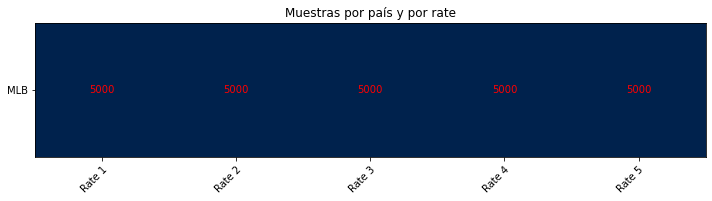

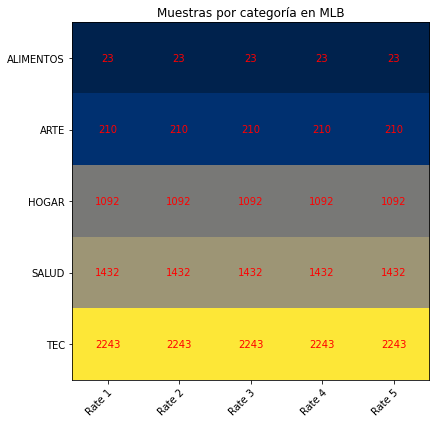

In [59]:
test_indices = []
for cat, n in country_samples['MLB'].items():
    idx = df_por[(df_por['category'] == inv_abbreviations[cat])].groupby('review_rate')\
            .sample(n=n,random_state=rs).index.tolist()
    test_indices.extend(idx)

df_por_test = df_por.loc[test_indices,['country','category','review_content','review_title','review_rate']]

plot_samples(df_por_test,['MLB'],rates,abbreviations)

In [60]:
df_por_test.groupby(['category','review_rate']).count()['review_content'].reset_index()

,category,review_rate,review_content
0,Alimentos y Bebidas / Alimentos e Bebidas,1,23
1,Alimentos y Bebidas / Alimentos e Bebidas,2,23
2,Alimentos y Bebidas / Alimentos e Bebidas,3,23
3,Alimentos y Bebidas / Alimentos e Bebidas,4,23
4,Alimentos y Bebidas / Alimentos e Bebidas,5,23
5,Arte y entretenimiento / Arte e Entretenimiento,1,210
6,Arte y entretenimiento / Arte e Entretenimiento,2,210
7,Arte y entretenimiento / Arte e Entretenimiento,3,210
8,Arte y entretenimiento / Arte e Entretenimiento,4,210
9,Arte y entretenimiento / Arte e Entretenimiento,5,210


In [61]:
train_indices = sorted(list(set(range(len(df_por))) - set(test_indices)))
df_por_train = df_por.loc[train_indices,['country','category','review_content','review_title','review_rate']]

In [62]:
df_por_train['review_rate'].value_counts()

5    49451
4    49451
3    49451
2    49451
1    49451
Name: review_rate, dtype: int64

In [63]:
df_por_train.to_csv('./por/train.csv',index=False)
df_por_test.to_csv('./por/test.csv',index=False)